In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix ,recall_score,f1_score,precision_score

In [ ]:
# read CSV file
data = pd.read_csv("Iris.csv",index_col='Id')

# Data Preprossing

In [ ]:
# showing the data......head(number of colums) defult 5 rows
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# the dimention of the data
data.shape

(150, 5)

In [ ]:
# make a Describtion to show mean and Stander deviation of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [ ]:
# showing the maxiume value in each colums
for colums in data.columns :
  if colums == 'Species':
    break
  print(f"{colums} max value is {data[colums].max()}")

SepalLengthCm max value is 7.9
SepalWidthCm max value is 4.4
PetalLengthCm max value is 6.9
PetalWidthCm max value is 2.5


In [ ]:
# give you information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [ ]:
# Showing if there is any null values in data
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
# show the unique values in colume 'Species'
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Exploratory Data Analysis

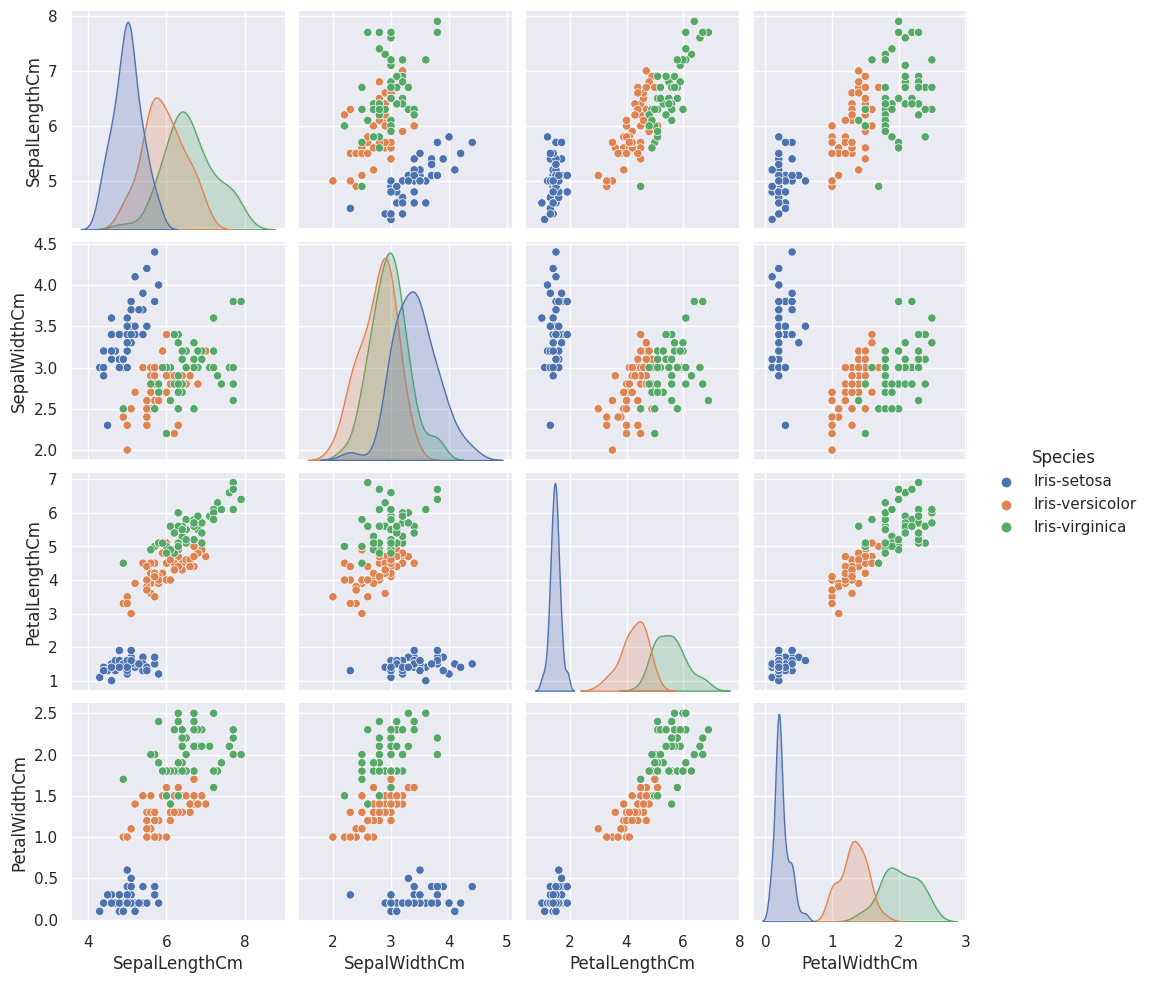

In [ ]:
sns.pairplot(data,hue='Species')
plt.show()

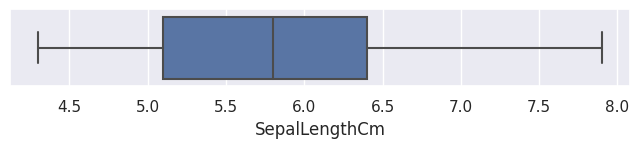

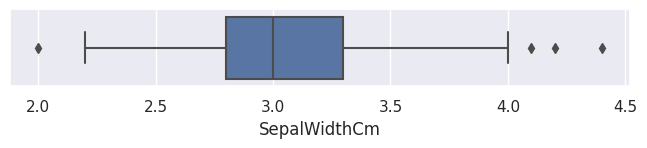

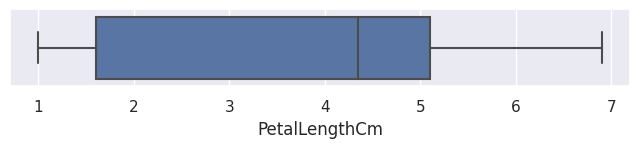

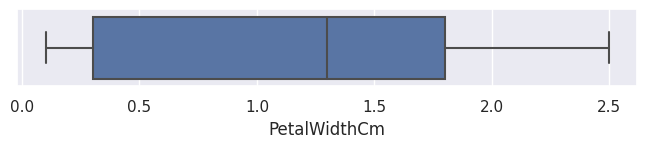

In [ ]:
for colums in data.columns:
  if colums == 'Species':
    break
  fig,ax = plt.subplots(1,figsize=(8,1))
  sns.boxplot(data,x=colums)
plt.show()

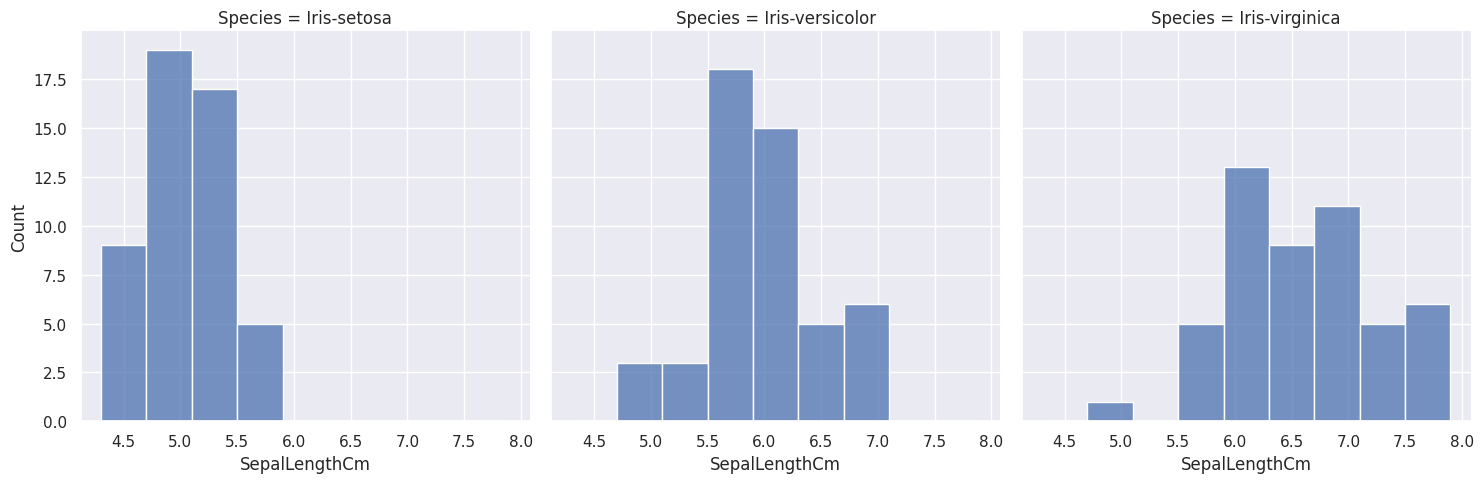

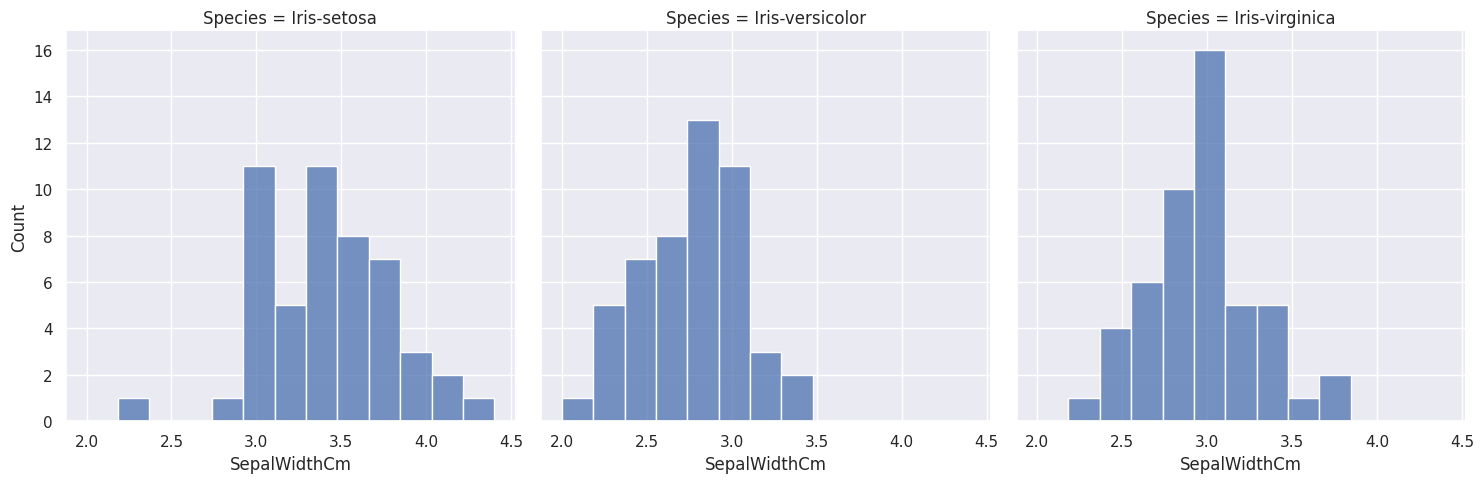

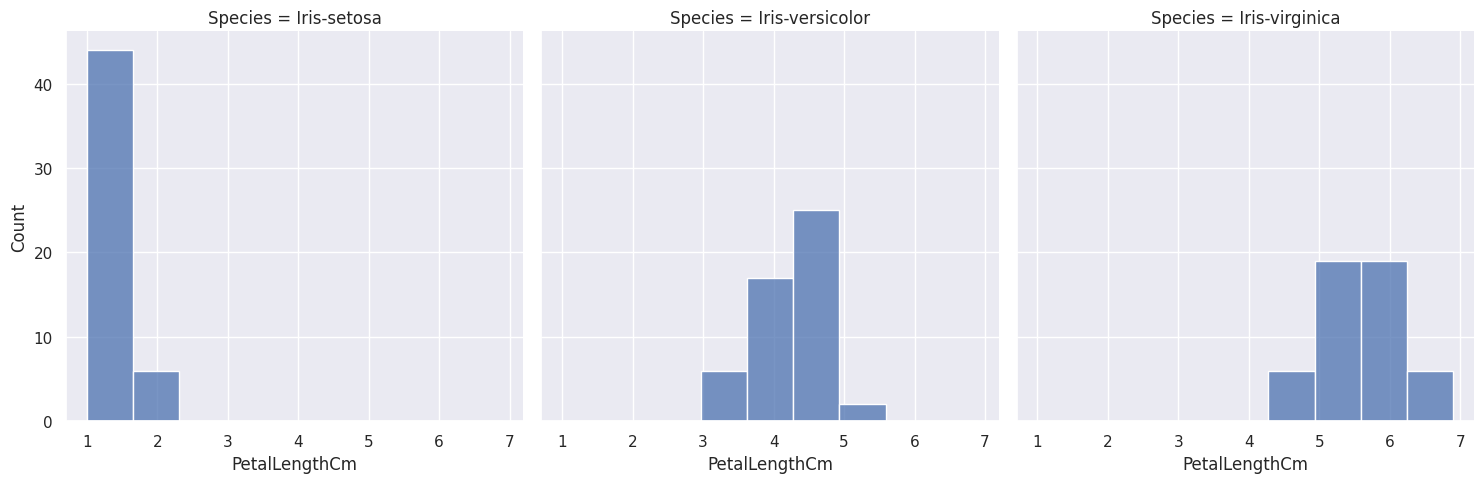

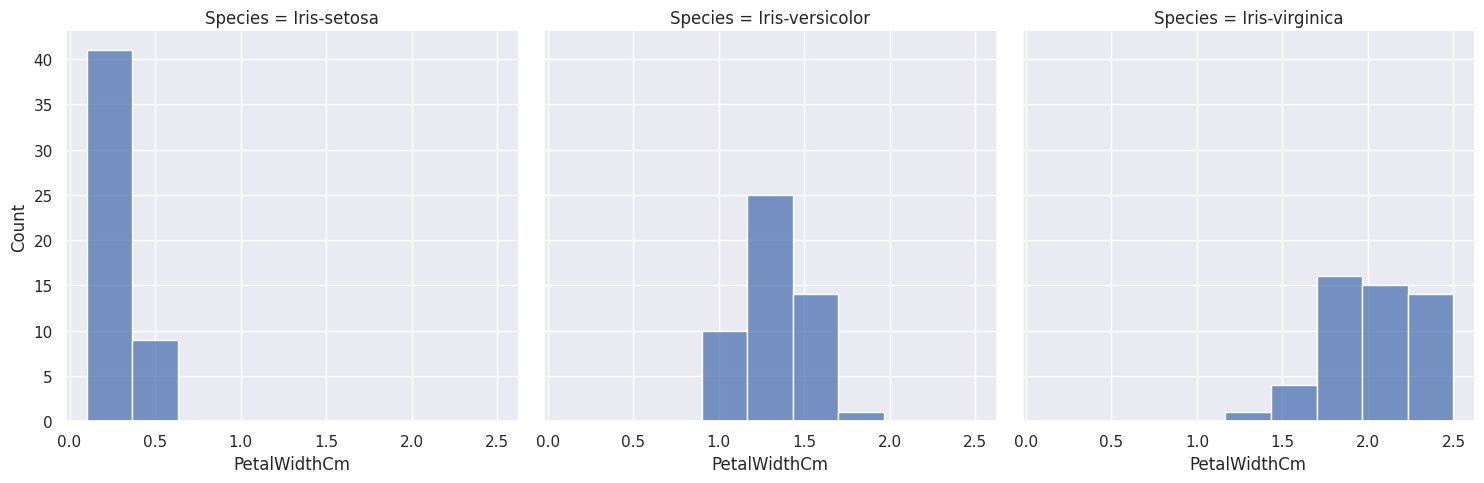

In [ ]:
for colums in data.columns :
  if colums == 'Species':
    break
  sns.set_theme(style='darkgrid')
  sns.displot(data,x=colums,col='Species')

plt.show()

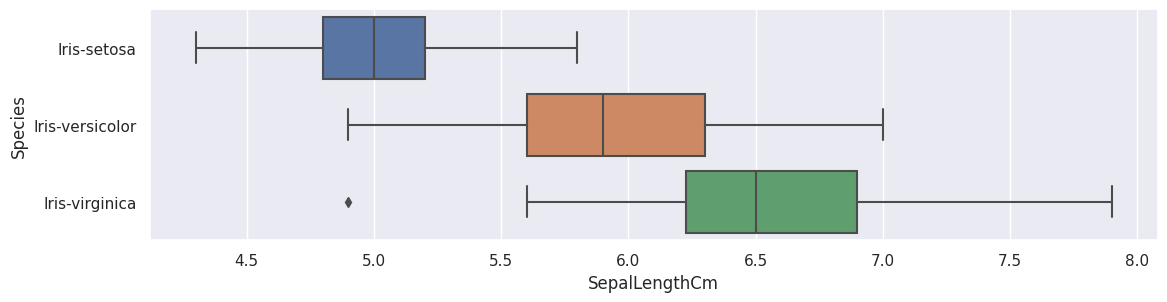

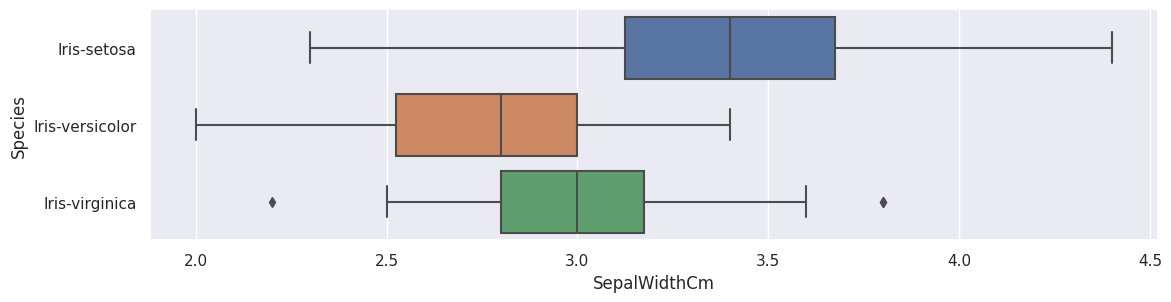

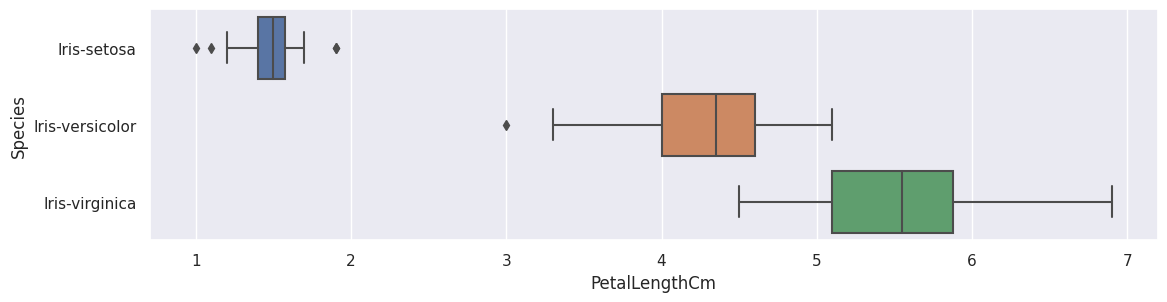

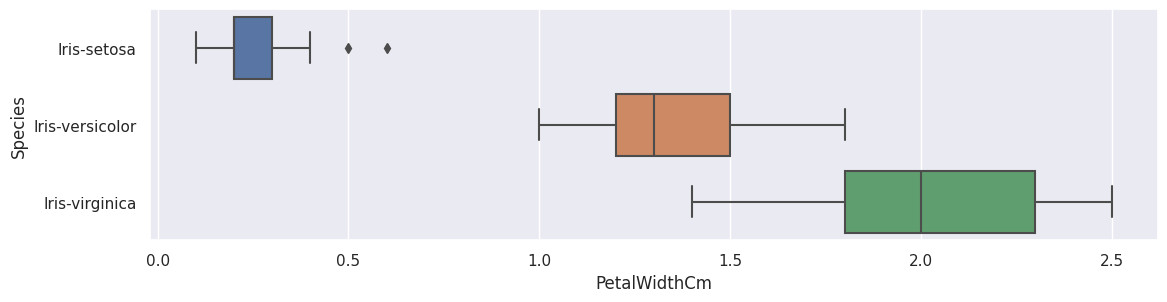

In [ ]:
for colums in data.columns :
  if colums == 'Species':
    break
  fig,ax = plt.subplots(1,figsize=(13,3))
  sns.boxplot(data,x=data[colums],y=data['Species'])

plt.show()

# Data Modeling

In [ ]:
# specify the the first four colums in data
X = data.iloc[:,:-1]
# specify the last column (that we want to be predict)
y = data.iloc[:,-1:]

In [ ]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0


In [ ]:
y

,Species
Id,
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
5,Iris-setosa
...,...
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [ ]:
# spliting the data into train and test data with 20% for test , the rest for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [ ]:
# machine Learning Model Support Vector machine For classification
model = SVC()
# training the modelon train data
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
# predicting values
pred = model.predict(X_test)

# Model Evaluate

In [ ]:
# evaluate the accuracy of the model
acc_score = accuracy_score(y_test,pred)
comfmatix = confusion_matrix(y_test,pred)
precision = precision_score(y_test, pred, average='macro')
recall = recall_score(y_test, pred, average='macro')
f1 = f1_score(y_test, pred, average='macro')

In [ ]:
print(f'accuracy score {acc_score} %')
print(f'Percision accuracy {precision} %')
print(f'recall accuracy {recall} %')
print(f'f1_Score {f1} % ')

accuracy score 1.0 %
Percision accuracy 1.0 %
recall accuracy 1.0 %
f1_Score 1.0 % 


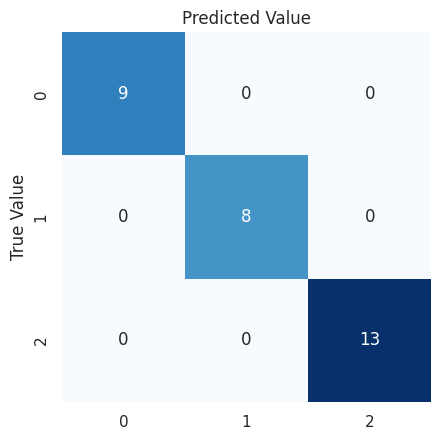

In [ ]:
# showing how many corrected predicted values to true value
sns.heatmap(comfmatix,annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.title("Predicted Value")
plt.ylabel("True Value")
plt.show()

In [ ]:
# Testing my model
pred1= model.predict([[4.5,3.6,2.5,0.3]])
pred1

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype=object)